In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
import math

from datetime import datetime

# Load the Dataset

### Department Data

- <b>dept_id</b> – Unique Department Code
- <b>dept_name</b> – Name of the Department
- <b>dept_head</b> – Name of the Head of the Department

In [2]:
department_data = pd.DataFrame()

cnx = mysql.connector.connect(host='cpanel.insaid.co', database='Capstone2',user='student', password='student')
query = "select * from department_data"
department_data = pd.read_sql(query, con=cnx)
cnx.close()

print(department_data)
print('MySQL connection is closed')

    dept_id    dept_name              dept_head
0    D00-IT           IT             Henry Adey
1    D00-SS        Sales        Edward J Bayley
2    D00-TP         Temp        Micheal Zachrey
3   D00-ENG  Engineering  Sushant Raghunathan K
4    D00-SP      Support         Amelia Westray
5    D00-FN      Finance              Aanchal J
6    D00-PR  Procurement            Louie Viles
7    D00-AD        Admin          Evelyn Tolson
8    D00-MN   Management          Ellie Trafton
9    D00-MT    Marketing           Reuben Swann
10   D00-PD      Product          Darcy Staines
MySQL connection is closed


### Employee Details data

- <b>employee_id</b> – Unique ID Number for each employee
- <b>age</b> – Age of the employee
- <b>gender</b> – Gender of the employee
- <b>marital_status</b> – Marital Status of the employee

In [3]:
employee_details_data = pd.DataFrame()

cnx = mysql.connector.connect(host='cpanel.insaid.co', database='Capstone2',user='student', password='student')
query = "select * from employee_details_data"
employee_details_data = pd.read_sql(query, con=cnx)
cnx.close()

print(employee_details_data)
print('MySQL connection is closed')

       employee_id  age  gender marital_status
0           113558   43    Male        Married
1           112256   24  Female      Unmarried
2           112586   22  Female      Unmarried
3           108071   36    Male        Married
4           116915   38    Male        Married
...            ...  ...     ...            ...
14240       111781   26    Male      Unmarried
14241       100372   35    Male        Married
14242       128083   30  Female        Married
14243       118487   24    Male      Unmarried
14244       118849   39    Male        Married

[14245 rows x 4 columns]
MySQL connection is closed


### Employee data

- <b>Target variable</b>
    - <b>status</b> – Current employment status (Employed / Left)
<br><br>
- <b>Administrative information</b>
    - <b>department</b> – Department to which the employees belong(ed) to
    - <b>salary</b> – Salary level with respect to rest of their department
    - <b>tenure</b> – Number of years at the company
    - <b>recently_promoted</b> – Was the employee promoted in the last 3 years?
    - <b>employee_id</b> – Unique ID Number for each employee
<br><br>
- <b>Workload information</b>
    - <b>n_projects</b> – Number of projects employee has worked on
    - <b>avg_monthly_hrs</b> – Average number of hours worked per month
<br><br>
- <b>Mutual evaluation information</b>
    - <b>satisfaction</b> – Score for employee’s satisfaction with the company (higher is better)
    - <b>last_evaluation</b> – Score for most recent evaluation of employee (higher is better)
    - <b>filed_complaint</b> – Has the employee filed a formal complaint in the last 3 years?

In [4]:
employee_data = pd.DataFrame()

cnx = mysql.connector.connect(host='cpanel.insaid.co', database='Capstone2',user='student', password='student')
query = "select * from employee_data"
employee_data = pd.read_sql(query, con=cnx)
cnx.close()

print(employee_data)
print('MySQL connection is closed')

       avg_monthly_hrs department  filed_complaint  last_evaluation  \
0                246.0       None              NaN         0.866838   
1                134.0       None              NaN         0.555718   
2                156.0     D00-SS              1.0         0.474082   
3                256.0     D00-SP              NaN         0.961360   
4                146.0     D00-SS              NaN         0.507349   
...                ...        ...              ...              ...   
14145            245.0     D00-SS              NaN         0.850785   
14146            192.0     D00-SS              NaN         0.951901   
14147            175.0     D00-MN              NaN         0.854538   
14148            268.0     D00-MT              NaN         0.900887   
14149            268.0     D00-IT              1.0         0.897098   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
0               6                NaN  medium      0.134415      Lef

### Save the data in .csv format

In [5]:
department_data.to_csv("department_data.csv")
employee_details_data.to_csv("employee_details_data.csv")
employee_data.to_csv("employee_data.csv")

In [6]:
employee_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [7]:
employee_data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14150.000000,2046.0,12663.000000,14150.000000,297.0,14000.000000,14000.000000,14150.000000
mean,199.994346,1.0,0.718399,3.778304,1.0,0.621212,3.499357,112080.750247
std,50.833697,0.0,0.173108,1.250162,0.0,0.250482,1.462584,8748.202856
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000,0.000000
25%,155.000000,1.0,0.563711,3.000000,1.0,0.450356,3.000000,105772.500000
50%,199.000000,1.0,0.724731,4.000000,1.0,0.652394,3.000000,111291.500000
75%,245.000000,1.0,0.871409,5.000000,1.0,0.824925,4.000000,116650.750000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000


### Check for duplicate values in employee data

In [8]:
emp_counts = pd.DataFrame(employee_data['employee_id'].value_counts().reset_index())
emp_counts.columns = ['emp_id', 'count']
dup_emp = emp_counts[emp_counts['count']>1]
print(dup_emp['emp_id'])

0          0
1     119780
2     104360
3     116850
4     109425
5     116533
6     105625
7     117454
8     102701
9     108265
10    112373
11    111323
12    106813
13    115446
14    112312
15    115325
16    110000
17    112203
18    111968
19    108128
20    101809
21    122385
22    116247
23    116153
24    116209
25    110546
26    109804
27    109085
28    108535
29    119754
Name: emp_id, dtype: int64


In [9]:
tmp = employee_data[employee_data['department'].isnull()]
sum(tmp['employee_id'].value_counts()>1)

0

### Remove the duplicate rows

In [10]:
employee_data = employee_data.drop_duplicates(keep='first')

### Check if all duplicates have been removed

In [11]:
print('Length of the dataset', len(employee_data))
pd.DataFrame(employee_data['employee_id'].value_counts().reset_index())

Length of the dataset 14121


,index,employee_id
0,0,5
1,111251,1
2,115373,1
3,117420,1
4,101028,1
...,...,...
14112,116034,1
14113,107838,1
14114,113981,1
14115,105785,1


So all duplicates have been removed, and now we are left with only these 5 employee ids having 0 in employee id. This can be retained as they are distinct rows. Also employee_id column may not be much use going further and we may drop it.

Edit 1: The 0 employee id causes null values at the time of joining with employee_details_data. So we can drop those rows here.

In [12]:
employee_details_data[employee_details_data['employee_id']==0]

,employee_id,age,gender,marital_status


As there are no rows in employee_details table with employee_id 0, we can drop it

##### Get the index of the rows with employee id as 0

In [13]:
employee_data[employee_data['employee_id']==0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.0,D00-SS,NaN,0.852702,6,NaN,low,0.069168,Left,4.0,0
304,264.0,D00-ENG,NaN,0.774554,6,NaN,low,0.110974,Left,4.0,0
1234,129.0,D00-SP,NaN,0.402660,2,NaN,medium,0.437359,Left,3.0,0
11304,167.0,None,NaN,0.880053,5,NaN,low,0.682140,Employed,3.0,0
12304,259.0,D00-ENG,NaN,0.505883,5,NaN,low,0.631046,Employed,4.0,0


In [14]:
zero_index = employee_data[employee_data['employee_id']==0].index
employee_data = employee_data.drop(index=zero_index)

In [15]:
employee_data[employee_data['employee_id']==0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


### Correct the '-IT' department name

In [16]:
employee_data['department'].value_counts()

D00-SS     3895
D00-ENG    2573
D00-SP     2108
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [17]:
dept_index = employee_data[employee_data['department']=='-IT'].index
employee_data.loc[dept_index,'department']='D00-IT'

In [18]:
employee_data['department'].value_counts()

D00-SS     3895
D00-ENG    2573
D00-SP     2108
D00-IT     1359
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

# Check for Null Values

In [19]:
employee_data.isnull().sum()

avg_monthly_hrs          0
department             706
filed_complaint      12075
last_evaluation       1487
n_projects               0
recently_promoted    13819
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
dtype: int64

### Fill up the other Missing Not at random columns

In [20]:
# Filed complaint fill with 0
null_index = employee_data[employee_data['filed_complaint'].isnull()].index
employee_data.loc[null_index, 'filed_complaint'] = 0

# Recently promoted with 0
null_index = employee_data[employee_data['recently_promoted'].isnull()].index
employee_data.loc[null_index, 'recently_promoted'] = 0

In [21]:
employee_data.isnull().sum()

avg_monthly_hrs         0
department            706
filed_complaint         0
last_evaluation      1487
n_projects              0
recently_promoted       0
salary                  0
satisfaction          150
status                  0
tenure                150
employee_id             0
dtype: int64

### Fixing Last evaluation column

In [22]:
employee_data['last_evaluation'].describe()

count    12629.000000
mean         0.718322
std          0.173069
min          0.316175
25%          0.563680
50%          0.724428
75%          0.871345
max          1.000000
Name: last_evaluation, dtype: float64

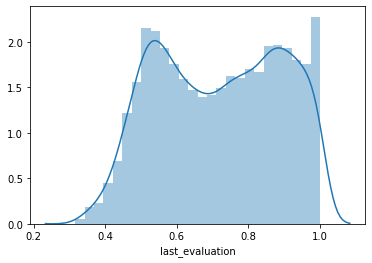

In [23]:
sns.distplot(employee_data['last_evaluation'])

In [24]:
employee_data.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id'],
      dtype='object')

In [25]:
last_eval_dataset = employee_data.drop(['employee_id'], axis=1)
last_eval_dataset.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,246.0,None,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0
1,134.0,None,0.0,0.555718,2,0.0,low,0.511041,Left,3.0
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0


In [26]:
last_eval_dataset.isnull().sum()

avg_monthly_hrs         0
department            706
filed_complaint         0
last_evaluation      1487
n_projects              0
recently_promoted       0
salary                  0
satisfaction          150
status                  0
tenure                150
dtype: int64

In [27]:
corr_columns = ['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction', 'tenure']
round(last_eval_dataset[corr_columns].corr(),2)

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure
avg_monthly_hrs,1.00,0.34,0.44,-0.02,0.13
last_evaluation,0.34,1.00,0.35,0.09,0.13
n_projects,0.44,0.35,1.00,-0.14,0.19
satisfaction,-0.02,0.09,-0.14,1.00,-0.10
tenure,0.13,0.13,0.19,-0.10,1.00


##### Prepare the last_eval_dataset for prediction. So, remove the null values in department and satisfaction & tenure

In [28]:
last_eval_dataset_prep = last_eval_dataset.dropna(subset=['department', 'satisfaction', 'tenure'])

In [29]:
last_eval_dataset_prep.isnull().sum()

avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation      1271
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [30]:
print(last_eval_dataset_prep.shape)

(13260, 10)


In [31]:
last_eval_dataset_prep.dtypes

avg_monthly_hrs      float64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

#### Dummify the categorical columns

In [32]:
last_eval_dataset_prep_dummy = pd.get_dummies(last_eval_dataset_prep, columns=['department', 'salary', 'status'], drop_first=True)

#### Prepare the train & test dataset for last_evaluation regression

Null value rows of last evaluation goes into the test dataset

In [33]:
last_eval_train = last_eval_dataset_prep_dummy[~last_eval_dataset_prep_dummy['last_evaluation'].isnull()]
last_eval_test = last_eval_dataset_prep_dummy[last_eval_dataset_prep_dummy['last_evaluation'].isnull()]

In [34]:
print(last_eval_train.shape)
print(last_eval_test.shape)

(11989, 19)
(1271, 19)


In [35]:
last_eval_train.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,salary_low,salary_medium,status_Left
2,156.0,1.0,0.474082,2,0.0,0.405101,3.0,0,0,0,0,0,0,0,0,1,0,1,1
3,256.0,0.0,0.961360,6,0.0,0.152974,4.0,0,0,0,0,0,0,0,1,0,1,0,1
4,146.0,0.0,0.507349,2,0.0,0.434845,3.0,0,0,0,0,0,0,0,0,1,0,1,1
5,135.0,0.0,0.482184,2,0.0,0.381545,3.0,0,0,0,0,1,0,0,0,0,1,0,1
6,270.0,0.0,0.867087,6,0.0,0.172575,4.0,0,0,0,0,0,1,0,0,0,1,0,1


#### Prepare the X & y target variables

In [36]:
X_train = last_eval_train.loc[:, last_eval_train.columns!='last_evaluation']
y_train = last_eval_train.loc[:, 'last_evaluation']

In [37]:
print(X_train.shape)
print(y_train.shape)

(11989, 18)
(11989,)


In [38]:
X_test = last_eval_test.loc[:, last_eval_train.columns!='last_evaluation']

In [39]:
print(X_test.shape)

(1271, 18)


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [41]:
#obj = LinearRegression()
#obj = KNeighborsRegressor()
obj = DecisionTreeRegressor(min_samples_split=3, max_features=15)

In [42]:
obj.fit(X_train, y_train)
y_train_pred = obj.predict(X_train)

#### Check prediction MSE & RMSE of Last_eval score

In [43]:
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_score = metrics.r2_score(y_train, y_train_pred)
print('MSE of last_evaluation prediction', round(mse_train,2))
print('R2_Score of last_evaluation prediction', round(r2_score,2))

MSE of last_evaluation prediction 0.0
R2_Score of last_evaluation prediction 0.98


##### Predict for the null values

In [44]:
y_test_pred = obj.predict(X_test)
y_test_pred

array([0.443835, 0.581183, 0.457284, ..., 0.416612, 0.659448, 0.601885])

#### Update the null values with the predicited satisfaction scores

In [45]:
null_index = last_eval_test[last_eval_test['last_evaluation'].isnull()].index
null_index

Int64Index([   21,    39,    49,    57,    94,   104,   110,   121,   131,
              149,
            ...
            14032, 14040, 14045, 14048, 14049, 14068, 14083, 14097, 14110,
            14118],
           dtype='int64', length=1271)

#### check if this corresponds to the null values in the employee dataset

In [46]:
# copy the employee_data for comparison of new & old distribution
employee_data_copy = employee_data.copy()
employee_data_copy.loc[null_index, 'last_evaluation']

21      NaN
39      NaN
49      NaN
57      NaN
94      NaN
         ..
14068   NaN
14083   NaN
14097   NaN
14110   NaN
14118   NaN
Name: last_evaluation, Length: 1271, dtype: float64

In [47]:
employee_data_copy.loc[null_index, 'last_evaluation'] = y_test_pred

#### Check for null values of last_evaluation column again

In [48]:
employee_data_copy['last_evaluation'].isnull().sum()

216

In [49]:
employee_data_copy[employee_data_copy['last_evaluation'].isnull()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
28,156.0,None,0.0,NaN,2,0.0,medium,0.465747,Left,3.0,128509
44,125.0,D00-TP,0.0,NaN,3,0.0,medium,NaN,Left,NaN,120360
71,153.0,None,0.0,NaN,2,0.0,low,0.455101,Left,3.0,121337
245,124.0,D00-TP,0.0,NaN,3,0.0,low,NaN,Left,NaN,116012
251,119.0,D00-TP,0.0,NaN,2,0.0,medium,NaN,Left,NaN,116287
...,...,...,...,...,...,...,...,...,...,...,...
13905,132.0,D00-TP,0.0,NaN,2,0.0,medium,NaN,Left,NaN,106482
13921,208.0,None,0.0,NaN,2,0.0,low,0.544351,Employed,2.0,111454
13960,116.0,D00-TP,0.0,NaN,2,0.0,low,NaN,Employed,NaN,105231
14004,151.0,None,0.0,NaN,4,0.0,medium,0.676767,Employed,3.0,101742


There are 216 null values remaining. This we can choose to drop or fill it with mean values. <br>
Proceeding with filling up with mean values

In [50]:
last_eval_mean = employee_data_copy['last_evaluation'].mean()
print('Mean last eval score: ', last_eval_mean)

Mean last eval score:  0.7153931332374074


In [51]:
employee_data_copy['last_evaluation'].fillna(value=last_eval_mean, inplace=True)

In [52]:
employee_data_copy['last_evaluation'].isnull().sum()

0

#### Re-check the distrbution if there is any deviation introduced

In [53]:
employee_data['last_evaluation'].describe()

count    12629.000000
mean         0.718322
std          0.173069
min          0.316175
25%          0.563680
50%          0.724428
75%          0.871345
max          1.000000
Name: last_evaluation, dtype: float64

In [54]:
employee_data_copy['last_evaluation'].describe()

count    14116.000000
mean         0.715393
std          0.171745
min          0.316175
25%          0.563437
50%          0.715393
75%          0.867281
max          1.000000
Name: last_evaluation, dtype: float64

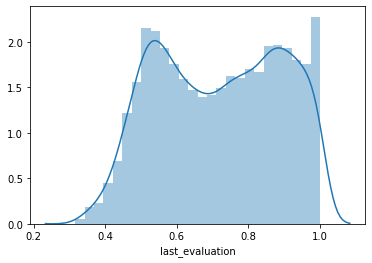

In [55]:
sns.distplot(employee_data['last_evaluation'])

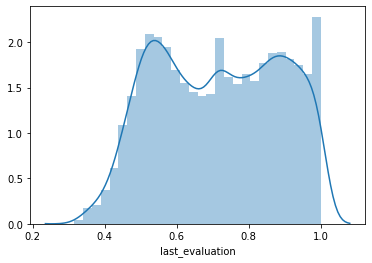

In [56]:
sns.distplot(employee_data_copy['last_evaluation'])

A little peak has been introduced, but lets go with it for now

In [57]:
employee_data.loc[:,'last_evaluation'] = employee_data_copy['last_evaluation']

In [58]:
# checking for null
employee_data['last_evaluation'].isnull().sum()

0

## FIxing the department column

In [59]:
employee_data['department'].isnull().sum()

706

#### Prepare the employee data for department prediction

In [60]:
# Dropping the null values of satisfaction & tenure
dept_data = employee_data.dropna(subset=['satisfaction', 'tenure'], axis=0)
dept_data.isnull().sum()

avg_monthly_hrs        0
department           706
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
status                 0
tenure                 0
employee_id            0
dtype: int64

In [61]:
dept_data['department'].unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-FN'], dtype=object)

#### Label encode the department data

In [62]:
labels = dept_data['department'].map({None:None, 'D00-SS':1, 'D00-SP':2, 'D00-MT':3, 'D00-PD':4, 'D00-IT':5, 'D00-AD':6,
                                      'D00-MN':7, 'D00-ENG':8, 'D00-PR':9, 'D00-FN':10})
dept_data.loc[labels.index, 'department'] = labels.values

C:\Users\sudeepm\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [63]:
dept_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,NaN,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467
1,134.0,NaN,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210
2,156.0,1.0,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150
3,256.0,2.0,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346
4,146.0,1.0,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707


#### Drop columns which may not be useful in  determing the department_id

In [64]:
dept_data = dept_data.drop('employee_id', axis=1)

In [65]:
dept_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,246.0,NaN,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0
1,134.0,NaN,0.0,0.555718,2,0.0,low,0.511041,Left,3.0
2,156.0,1.0,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0
3,256.0,2.0,0.0,0.961360,6,0.0,low,0.152974,Left,4.0
4,146.0,1.0,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0


#### Dummify the categorical columns

In [66]:
dept_data_dummy = pd.get_dummies(dept_data, columns=['salary', 'status'])

In [67]:
dept_data_dummy.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_high,salary_low,salary_medium,status_Employed,status_Left
0,246.0,NaN,0.0,0.866838,6,0.0,0.134415,4.0,0,0,1,0,1
1,134.0,NaN,0.0,0.555718,2,0.0,0.511041,3.0,0,1,0,0,1
2,156.0,1.0,1.0,0.474082,2,0.0,0.405101,3.0,0,0,1,0,1
3,256.0,2.0,0.0,0.961360,6,0.0,0.152974,4.0,0,1,0,0,1
4,146.0,1.0,0.0,0.507349,2,0.0,0.434845,3.0,0,0,1,0,1


### Using ML algorithms to impute null values in Department table

In [68]:
dept_data_train = dept_data_dummy[~dept_data_dummy['department'].isnull()]
dept_data_test = dept_data_dummy[dept_data_dummy['department'].isnull()]

In [69]:
print(dept_data_train['department'].isnull().sum())
print(dept_data_test['department'].isnull().sum())

0
706


#### Putting all the non-values into train dataset and the null values into a test dataset

In [70]:
X_train = dept_data_train.loc[:, dept_data_train.columns!='department']
y_train = dept_data_train.loc[:, 'department']

In [71]:
print(X_train.shape)
print(y_train.shape)

(13260, 12)
(13260,)


In [72]:
X_test = dept_data_test.loc[:, dept_data_test.columns!='department']

In [ ]:
print(X_test.shape)

### Check for null

In [73]:
X_train.isnull().sum()

avg_monthly_hrs      0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
satisfaction         0
tenure               0
salary_high          0
salary_low           0
salary_medium        0
status_Employed      0
status_Left          0
dtype: int64

In [74]:
X_test.isnull().sum()

avg_monthly_hrs      0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
satisfaction         0
tenure               0
salary_high          0
salary_low           0
salary_medium        0
status_Employed      0
status_Left          0
dtype: int64

### Scaling the dataset prior to ML algorithm

In [75]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

obj = DecisionTreeClassifier(min_samples_split=3, max_features=10)
#obj.fit(X_train_scaled, y_train) # not required for Dtree
obj.fit(X_train, y_train)
y_train_pred = obj.predict(X_train_scaled)
#y_train_pred = obj.predict(X_train) #not required for Dtree

In [77]:
y_train_pred

array([1., 2., 1., ..., 2., 5., 2.])

#### Model Evaluation

In [78]:
from sklearn import metrics

In [79]:
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
print('Accuracy for training set is {}'.format(train_accuracy))

Accuracy for training set is 0.9052790346907994


#### Updated the test dataset with the predicted values

In [80]:
y_test_pred = obj.predict(X_test)
print(len(y_test_pred))

706


In [81]:
dept_data_test.loc[:,'department'] = y_test_pred

C:\Users\sudeepm\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#### Reverse the label mapping for department table

In [82]:
rev_labels = dept_data_test['department'].map({None:None, 1:'D00-SS', 2:'D00-SP', 3:'D00-MT', 4:'D00-PD', 5:'D00-IT',
                                           6:'D00-AD', 7:'D00-MN', 8:'D00-ENG', 9:'D00-PR', 10:'D00-FN'})
dept_data_test.loc[rev_labels.index, 'department'] = rev_labels.values

In [83]:
dept_data_test.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_high,salary_low,salary_medium,status_Employed,status_Left
0,246.0,D00-AD,0.0,0.866838,6,0.0,0.134415,4.0,0,0,1,0,1
1,134.0,D00-SP,0.0,0.555718,2,0.0,0.511041,3.0,0,1,0,0,1
25,155.0,D00-FN,0.0,0.464598,2,0.0,0.414451,3.0,0,0,1,0,1
28,156.0,D00-SS,0.0,0.715393,2,0.0,0.465747,3.0,0,0,1,0,1
40,233.0,D00-ENG,0.0,0.965382,5,0.0,0.962314,5.0,0,0,1,0,1


In [84]:
null_dept_index = employee_data[employee_data['department'].isnull()].index

In [85]:
employee_data_copy = employee_data.copy()

In [86]:
employee_data_copy.loc[null_dept_index, 'department'] = dept_data_test['department']

In [87]:
employee_data['department'].value_counts()

D00-SS     3895
D00-ENG    2573
D00-SP     2108
D00-IT     1359
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [88]:
employee_data_copy['department'].value_counts()

D00-SS     4133
D00-ENG    2710
D00-SP     2218
D00-IT     1423
D00-PD      902
D00-MT      847
D00-FN      762
D00-MN      607
D00-AD      187
D00-PR      177
D00-TP      150
Name: department, dtype: int64

In [103]:
employee_data.loc[:, 'department'] = employee_data_copy['department']

In [104]:
employee_data.isnull().sum()

avg_monthly_hrs        0
department             0
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction         150
status                 0
tenure               150
employee_id            0
dtype: int64

## Fixing the null values in Tenure column

#### Prepare the dataset for null value imputing

In [105]:
tenure_data = employee_data.drop('status', axis=1)

In [106]:
tenure_data['satisfaction'].fillna(value=tenure_data['satisfaction'].mean(), inplace=True)

In [110]:
tenure_data_dummy = pd.get_dummies(tenure_data, columns=['department', 'salary'], drop_first=True)

In [111]:
tenure_data_train = tenure_data_dummy[~tenure_data_dummy['tenure'].isnull()]
tenure_data_test = tenure_data_dummy[tenure_data_dummy['tenure'].isnull()]
print(tenure_data_train['tenure'].isnull().sum())
print(tenure_data_test['tenure'].isnull().sum())

0
150


#### Putting all the non-values into train dataset and the null values into a test dataset

In [112]:
X_train = tenure_data_train.loc[:, tenure_data_train.columns!='tenure']
y_train = tenure_data_train.loc[:, 'tenure']
print(X_train.shape)
print(y_train.shape)

(13966, 19)
(13966,)


In [114]:
X_test = tenure_data_test.loc[:, tenure_data_test.columns!='tenure']
print(X_test.shape)

(150, 19)


### Scaling the dataset prior to running K-NN

In [117]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)

In [125]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#obj = KNeighborsRegressor()
#obj = LinearRegression()
obj = DecisionTreeRegressor(min_samples_split=3, max_features=10)
#obj.fit(X_train_scaled, y_train) # not required for Dtree
obj.fit(X_train, y_train)
#y_train_pred = obj.predict(X_train_scaled) # not required for Dtree
y_train_pred = obj.predict(X_train)

###  Model Evaluation

In [ ]:
from sklearn import metrics

In [126]:
MSE_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_score = metrics.r2_score(y_train, y_train_pred)
print('MSE for training set is {}'.format(MSE_train))
print('R2 score for training set is {}'.format(r2_score))

MSE for training set is 0.0685593584419304
R2 score for training set is 0.9678534066234284


### Predict for the NaN values for Tenure column

In [127]:
X_test_scaled = std.transform(X_test)
#y_test_pred = knn.predict(X_test_scaled) # not required for Dtree
y_test_pred = knn.predict(X_test)

In [129]:
y_test_pred = np.round(y_test_pred,0)

### Update the null values with the predicted output

In [131]:
tenure_null_index = tenure_data[tenure_data_dummy['tenure'].isnull()].index

In [132]:
tenure_data.loc[tenure_null_index, 'tenure'] = y_test_pred

In [133]:
tenure_data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
tenure               0
employee_id          0
dtype: int64

#### check the distribution

In [136]:
employee_data['tenure'].describe()

count    13966.000000
mean         3.497709
std          1.460432
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: tenure, dtype: float64

In [137]:
tenure_data['tenure'].describe()

count    14116.000000
mean         3.481794
std          1.460747
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: tenure, dtype: float64

In [139]:
employee_data.loc[:, 'tenure'] = tenure_data['tenure']

In [140]:
employee_data.isnull().sum()

avg_monthly_hrs        0
department             0
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction         150
status                 0
tenure                 0
employee_id            0
dtype: int64

## Fixing the null values of satisfaction column

In [151]:
satisfaction_data = employee_data.drop('employee_id', axis=1)
satisfaction_data_dummy = pd.get_dummies(satisfaction_data, columns=['department','salary', 'status'], drop_first=True)
satisfaction_data_dummy.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,salary_low,salary_medium,status_Left
0,246.0,0.0,0.866838,6,0.0,0.134415,4.0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,134.0,0.0,0.555718,2,0.0,0.511041,3.0,0,0,0,0,0,0,0,1,0,0,1,0,1
2,156.0,1.0,0.474082,2,0.0,0.405101,3.0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,256.0,0.0,0.961360,6,0.0,0.152974,4.0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,146.0,0.0,0.507349,2,0.0,0.434845,3.0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [152]:
satisfaction_data_train = satisfaction_data_dummy[~satisfaction_data_dummy['satisfaction'].isnull()]
satisfaction_data_test = satisfaction_data_dummy[satisfaction_data_dummy['satisfaction'].isnull()]
print(satisfaction_data_train['satisfaction'].isnull().sum())
print(satisfaction_data_test['satisfaction'].isnull().sum())

0
150


In [153]:
X_train = satisfaction_data_train.loc[:, satisfaction_data_train.columns!='satisfaction']
y_train = satisfaction_data_train.loc[:, 'satisfaction']
print(X_train.shape)
print(y_train.shape)

(13966, 19)
(13966,)


In [154]:
X_test = satisfaction_data_test.loc[:, satisfaction_data_test.columns!='satisfaction']
print(X_test.shape)

(150, 19)


In [155]:
std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)

In [158]:
#obj = KNeighborsRegressor()
obj = DecisionTreeRegressor(min_samples_split=3, max_features=10)
#obj.fit(X_train_scaled, y_train) # not required for Dtree
obj.fit(X_train, y_train)
#y_train_pred = obj.predict(X_train_scaled) #not required for Dtree
y_train_pred = obj.predict(X_train) 

## Model Evaluation

In [159]:
MSE_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_score = metrics.r2_score(y_train, y_train_pred)
print('MSE for training set is {}'.format(MSE_train))
print('R2 score for training set is {}'.format(r2_score))

MSE for training set is 0.0019069168054986906
R2 score for training set is 0.9695992316159514


## Predict for Nan Satisfaction value

In [162]:
#X_test_scaled = std.transform(X_test) # not required for Dtree
#y_test_pred = knn.predict(X_test_scaled) # not required for Dtree
y_test_pred = obj.predict(X_test)

In [163]:
y_test_pred

array([0.3019325, 0.3019325, 0.3019325, 0.3019325, 0.3019325, 0.3019325,
       0.3019325, 0.3019325, 0.3019325, 0.3019325, 0.3019325, 0.3019325,
       0.3019325, 0.321055 , 0.292578 , 0.292578 , 0.292578 , 0.700214 ,
       0.292578 , 0.4849315, 0.292578 , 0.747304 , 0.747304 , 0.292578 ,
       0.292578 , 0.321055 , 0.355802 , 0.292578 , 0.4849315, 0.700214 ,
       0.747304 , 0.353689 , 0.545332 , 0.700214 , 0.25867  , 0.355802 ,
       0.3019325, 0.292578 , 0.292578 , 0.5651   , 0.292578 , 0.321055 ,
       0.545332 , 0.292578 , 0.5651   , 0.700214 , 0.4849315, 0.292578 ,
       0.355802 , 0.700214 , 0.292578 , 0.292578 , 0.321055 , 0.747304 ,
       0.292578 , 0.3019325, 0.292578 , 0.292578 , 0.321055 , 0.747304 ,
       0.292578 , 0.292578 , 0.292578 , 0.292578 , 0.729546 , 0.292578 ,
       0.292578 , 0.292578 , 0.700214 , 0.353689 , 0.4849315, 0.321055 ,
       0.292578 , 0.321055 , 0.3019325, 0.292578 , 0.292578 , 0.321055 ,
       0.4849315, 0.5651   , 0.321055 , 0.292578 , 

### Update the null values with the values from K-NN output

In [164]:
sat_null_index = satisfaction_data[satisfaction_data['satisfaction'].isnull()].index
satisfaction_data.loc[sat_null_index, 'satisfaction'] = y_test_pred

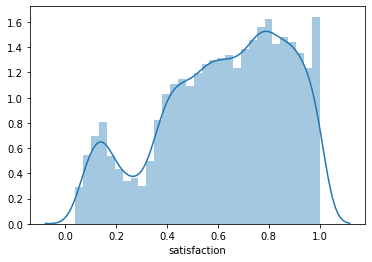

In [165]:
sns.distplot(employee_data['satisfaction'])

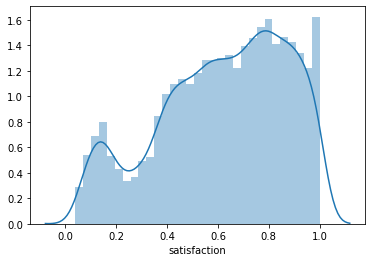

In [166]:
sns.distplot(satisfaction_data['satisfaction'])

#### Update the employee data with the predicted values

In [167]:
employee_data.loc[:, 'satisfaction'] = satisfaction_data['satisfaction']

### Final check for missing data

In [168]:
employee_data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
employee_id          0
dtype: int64

## Check the size of the employee dataset

In [184]:
print('Final size of employee data: ', len(employee_data))
print('Dropped 29 duplicate rows and 5 rows that correspond to 0 employee_id')
print('Total dropped rows: ', 14150 - len(employee_data))

Final size of employee data:  14116
Dropped 29 duplicate rows and 5 rows that correspond to 0 employee_id
Total dropped rows:  34


### Check out the other datasets

In [176]:
department_data

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [177]:
employee_details_data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [178]:
print('# of rows in department_data', len(department_data))
print('# of rows in employee_details_data', len(employee_details_data))
print('# of rows in employee_data', len(employee_data))

# of rows in department_data 11
# of rows in employee_details_data 14245
# of rows in employee_data 14116


### Check for duplicate values in employee_details_data

In [179]:
employee_details_data['employee_id'].value_counts().sum()

14245

As the sum value of 14,245 is equal to # of rows in employee_details_data, there is no duplicate values

### Check for null values

In [180]:
department_data.isnull().sum()

dept_id      0
dept_name    0
dept_head    0
dtype: int64

In [181]:
employee_details_data.isnull().sum()

employee_id       0
age               0
gender            0
marital_status    0
dtype: int64

No null values, no duplicate values, so we are good to go ahead with joining the datasets

# Data Merge

### Employee details merge with employee data

In [185]:
details_employee_data = employee_data.merge(employee_details_data, how='left', on='employee_id')

In [186]:
# Checking for duplicates
details_employee_data['employee_id'].value_counts().sum()

14116

In [187]:
details_employee_dept_data = details_employee_data.merge(department_data, how='left',
                                                         left_on='department', right_on='dept_id')
# Drop the department column name as it is duplicate
details_employee_dept_data.drop('department', axis=1, inplace=True)
details_employee_dept_data.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42,Female,Married,D00-AD,Admin,Evelyn Tolson
1,134.0,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23,Female,Unmarried,D00-SP,Support,Amelia Westray
2,156.0,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,24,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,256.0,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346,51,Female,Married,D00-SP,Support,Amelia Westray
4,146.0,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707,23,Female,Unmarried,D00-SS,Sales,Edward J Bayley


In [188]:
# Check for null
details_employee_dept_data.isnull().sum()

avg_monthly_hrs      0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
employee_id          0
age                  0
gender               0
marital_status       0
dept_id              0
dept_name            0
dept_head            0
dtype: int64

In [189]:
# Check for dubplicate values
details_employee_dept_data['employee_id'].value_counts().sum()

14116

# Exploratory Data analysis

In [190]:
dataset = details_employee_dept_data.copy()
dataset.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42,Female,Married,D00-AD,Admin,Evelyn Tolson
1,134.0,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23,Female,Unmarried,D00-SP,Support,Amelia Westray
2,156.0,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,24,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,256.0,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346,51,Female,Married,D00-SP,Support,Amelia Westray
4,146.0,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707,23,Female,Unmarried,D00-SS,Sales,Edward J Bayley


In [191]:
dataset.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure',
       'employee_id', 'age', 'gender', 'marital_status', 'dept_id',
       'dept_name', 'dept_head'],
      dtype='object')

In [192]:
cols = ['avg_monthly_hrs', 'last_evaluation', 'n_projects','satisfaction','tenure','age']

In [193]:
dataset[cols].corr()

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure,age
avg_monthly_hrs,1.000000,0.322338,0.439014,0.002598,0.143155,0.206099
last_evaluation,0.322338,1.000000,0.336361,0.100437,0.128369,0.156899
n_projects,0.439014,0.336361,1.000000,-0.122571,0.207764,0.624943
satisfaction,0.002598,0.100437,-0.122571,1.000000,-0.085885,-0.037168
tenure,0.143155,0.128369,0.207764,-0.085885,1.000000,0.095854
age,0.206099,0.156899,0.624943,-0.037168,0.095854,1.000000


#### Procedure for a different representation of heatmap

In [194]:
def heatmap(x,y,size,colors):
    fig, ax = plt.subplots(figsize=(10,6))
    x_labels = [ v for v in x.unique()]
    y_labels = [ v for v in y.unique()[::-1]]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)}
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)}
    size_scale = 500
    color_min, color_max = [-1,1]
    n_colors = 256
    palette = sns.diverging_palette(10,240,n=n_colors)
    plot_grid = plt.GridSpec(1,15,hspace=0.2, wspace=0.1)
    ax = plt.subplot(plot_grid[:,:-1])
    
    def value_to_color(val):
        val_position = float((val - color_min))/(color_max - color_min)
        ind = int(val_position*(n_colors-1))
        return palette[ind]
    
    ax.scatter(x=x.map(x_to_num),
               y=y.map(y_to_num),
               s=size*size_scale,
               c=colors.apply(value_to_color),
               marker='s')    
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right',fontsize=12)
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels, fontsize=12)
    ax.grid(False,'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t+0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t+0.5 for t in ax.get_yticks()], minor=True)
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()])+0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()])+0.5])
    
    # select the area for the bar
    ax = plt.subplot(plot_grid[:,-1])
    col_x = [0]*len(palette)
    bar_y = np.linspace(color_min, color_max, n_colors)
    bar_height = bar_y[1] - bar_y[0]
    ax.barh(y=bar_y,
            width=[5]*len(palette),
            left=col_x,
            height=bar_height,
            color=palette,
            linewidth=0)
    ax.set_xlim(1,2)
    ax.grid(False)
    ax.set_facecolor('white')
    ax.set_xticks([])
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y),3))
    ax.yaxis.tick_right()

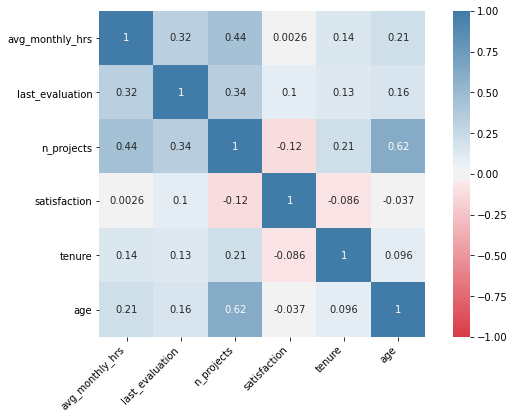

In [195]:
data_corr = dataset[cols].corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(data_corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(10,240,n=256),square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

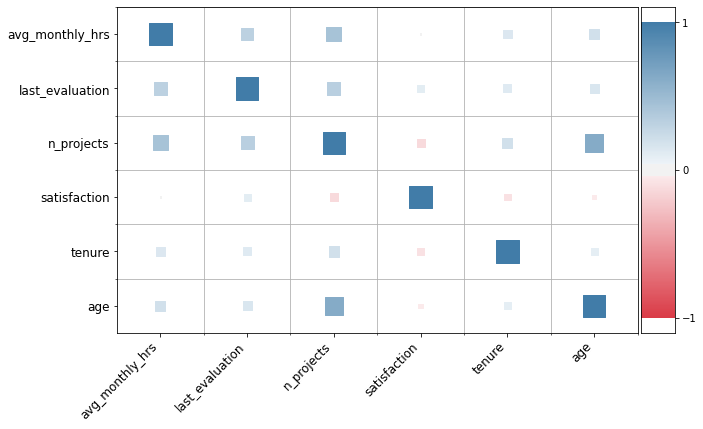

In [196]:
data_corr = dataset[cols].corr()
data_corr = pd.melt(data_corr.reset_index(), id_vars='index')
data_corr.columns = ['x','y','value']
heatmap(x=data_corr['x'], y=data_corr['y'], size=data_corr['value'].abs(),colors=data_corr['value'])

From the above correlation matrix, we comment on the following points:
<br><br>
<b>Avg Monthly hrs:</b>
- As the number of project assignments for an employee increases, he clocks more time
- Though the correlation is weak, but we can say that more the time the employee works chances are that he may be dissatisfied
- Also more the time spent in office, higher is the evaluation score
- Senior people(age & tenure) tend to spend more time in office
<br><br>
<b>Last evaluation</b>
- People spending more time in office have a greater chance of getting a high evaluation score
- People who stay with the company have a better chance of getting a higer evaluation score
- People who get a higher evaluation score tend to be more satisfied
- People with higher evaluation score tend to have higher project assignments
<br><br>
<b>n_projects</b>
- Senior people(age & tenure) tend to get more project assignments
- Too many project assignments is also a strong reason for dissatisfaction
- Though the correlation is weak, senior people (in age & tenure) tend to be more dissatisfied

# Feature Selection

In [197]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [198]:
feat_dataset = dataset.copy()
feat_dataset.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42,Female,Married,D00-AD,Admin,Evelyn Tolson
1,134.0,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23,Female,Unmarried,D00-SP,Support,Amelia Westray
2,156.0,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,24,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,256.0,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346,51,Female,Married,D00-SP,Support,Amelia Westray
4,146.0,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707,23,Female,Unmarried,D00-SS,Sales,Edward J Bayley


In [199]:
drop_cols = ['dept_name', 'employee_id']

In [200]:
feat_dataset.drop(drop_cols, axis=1, inplace=True)
feat_dataset.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,dept_id,dept_head
0,246.0,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,42,Female,Married,D00-AD,Evelyn Tolson
1,134.0,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,23,Female,Unmarried,D00-SP,Amelia Westray
2,156.0,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,24,Female,Unmarried,D00-SS,Edward J Bayley
3,256.0,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,51,Female,Married,D00-SP,Amelia Westray
4,146.0,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,23,Female,Unmarried,D00-SS,Edward J Bayley


#### encode the binary value columns in the feature dataset

In [201]:
feat_dataset['status'] = feat_dataset['status'].map({'Left':1, 'Employed':0})
feat_dataset['gender'] = feat_dataset['gender'].map({'Female':0, 'Male':1})
feat_dataset['marital_status'] = feat_dataset['marital_status'].map({'Unmarried':0, 'Married':1})

In [202]:
feat_dataset.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,dept_id,dept_head
0,246.0,0.0,0.866838,6,0.0,medium,0.134415,1,4.0,42,0,1,D00-AD,Evelyn Tolson
1,134.0,0.0,0.555718,2,0.0,low,0.511041,1,3.0,23,0,0,D00-SP,Amelia Westray
2,156.0,1.0,0.474082,2,0.0,medium,0.405101,1,3.0,24,0,0,D00-SS,Edward J Bayley
3,256.0,0.0,0.961360,6,0.0,low,0.152974,1,4.0,51,0,1,D00-SP,Amelia Westray
4,146.0,0.0,0.507349,2,0.0,medium,0.434845,1,3.0,23,0,0,D00-SS,Edward J Bayley


#### Dummify the other columns which have multiple categories

In [203]:
dummy_cols = ['salary', 'dept_id', 'dept_head']
feat_dataset_dummy = pd.get_dummies(feat_dataset, columns=dummy_cols, drop_first=True)

### Creating an arrya of dataset values and splitting into X & target variable y

In [204]:
X = feat_dataset_dummy.loc[:, feat_dataset_dummy.columns!='status'].values
y = feat_dataset_dummy.loc[:, 'status'].values

In [205]:
print(X.shape)
print(y.shape)

(14116, 32)
(14116,)


#### Using SelectKBest to select 5 best features

In [206]:
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X, y)

In [207]:
# Summarizing the scores
np.set_printoptions(precision=3)
print(fit.scores_)

[7.678e+01 3.596e+02 7.895e-01 9.979e+00 5.269e+01 2.422e+03 2.978e+02
 3.772e+01 2.126e+02 8.555e+01 2.557e+02 6.829e+01 6.793e+00 5.134e+00
 3.681e+00 3.233e+01 2.244e-01 1.352e+00 2.149e+01 1.971e+00 2.827e+00
 9.114e+00 1.971e+00 1.352e+00 2.827e+00 3.233e+01 5.909e-01 3.681e+00
 2.149e+01 9.114e+00 2.244e-01 6.793e+00]


In [208]:
# Creating list of feature names
feat_names = feat_dataset_dummy.columns[feat_dataset_dummy.columns !='status']

In [209]:
# Sorting the sores by descending order
for score, name in sorted(zip(fit.scores_, feat_names), reverse=True):
    print('Feature Score of', name, ':', round(score,2))

Feature Score of satisfaction : 2422.35
Feature Score of filed_complaint : 359.63
Feature Score of tenure : 297.77
Feature Score of salary_low : 255.73
Feature Score of gender : 212.64
Feature Score of marital_status : 85.55
Feature Score of avg_monthly_hrs : 76.78
Feature Score of salary_medium : 68.29
Feature Score of recently_promoted : 52.69
Feature Score of age : 37.72
Feature Score of dept_id_D00-MN : 32.33
Feature Score of dept_head_Ellie Trafton : 32.33
Feature Score of dept_id_D00-PR : 21.49
Feature Score of dept_head_Louie Viles : 21.49
Feature Score of n_projects : 9.98
Feature Score of dept_id_D00-TP : 9.11
Feature Score of dept_head_Micheal Zachrey : 9.11
Feature Score of dept_id_D00-ENG : 6.79
Feature Score of dept_head_Sushant Raghunathan K : 6.79
Feature Score of dept_id_D00-FN : 5.13
Feature Score of dept_id_D00-IT : 3.68
Feature Score of dept_head_Henry Adey : 3.68
Feature Score of dept_id_D00-SS : 2.83
Feature Score of dept_head_Edward J Bayley : 2.83
Feature Score o

From the above we can note the below columns as important in determining their exit status in order of importance
1. satisfaction 
2. filed_complaint 
3. tenure
4. salary
5. gender
6. marital_status
7. avg_monthly_hrs
8. recently_promoted 
9. age
10. dept
11. dept_head
12. last_evaluation
13. n_projects

## Explore the distribution of the dataset

### Target variable status for class imbalance

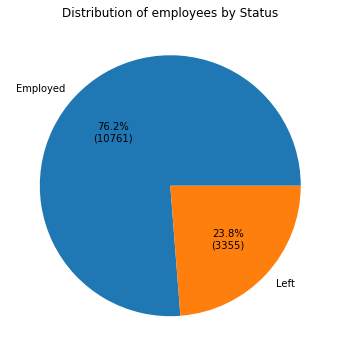

In [210]:
def func(pct, allvalues): 
    absolute = int(round((pct / 100.*np.sum(allvalues)),0))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.figure(figsize=(10,6))
plt.pie(dataset['status'].value_counts(),
        labels=dataset['status'].value_counts().index,
        autopct=lambda pct: func(pct, dataset['status'].value_counts()));
plt.title('Distribution of employees by Status');

There is class imbalance which needs to addressed while running our predictive algorithms.

### Distribution of employees by department

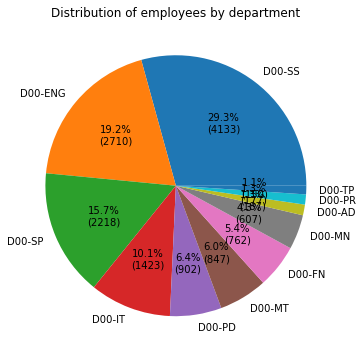

In [211]:
plt.figure(figsize=(10,6))
plt.pie(dataset['dept_id'].value_counts(),
        labels=dataset['dept_id'].value_counts().index,
        autopct=lambda pct: func(pct, dataset['dept_id'].value_counts()))
plt.title('Distribution of employees by department');

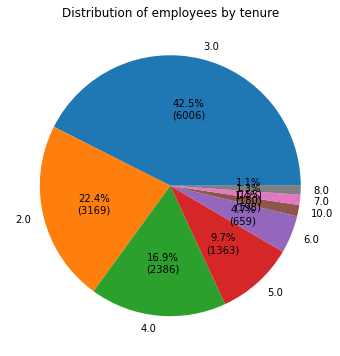

In [212]:
plt.figure(figsize=(10,6))
plt.pie(dataset['tenure'].value_counts(),
        labels=dataset['tenure'].value_counts().index,
        autopct=lambda pct: func(pct, dataset['tenure'].value_counts()))
plt.title('Distribution of employees by tenure');

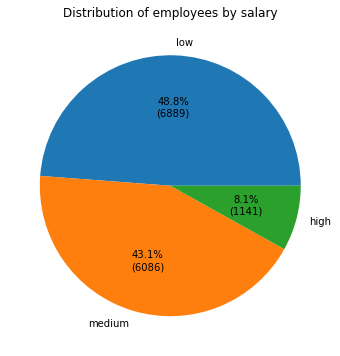

In [213]:
plt.figure(figsize=(10,6))
plt.pie(dataset['salary'].value_counts(),
        labels=dataset['salary'].value_counts().index,
        autopct=lambda pct: func(pct, dataset['salary'].value_counts()))
plt.title('Distribution of employees by salary');

# Compare the target variable with the rest

### Function to plot stacked bar charts against other categorical columns

In [214]:
def plot_stacked_bars_category(groupbycol):
    col_status = pd.DataFrame(dataset[dataset['status']=='Employed'].groupby(groupbycol)['status'].count())
    col_status['Left'] = dataset[dataset['status']=='Left'].groupby(groupbycol)['status'].count()
    col_status.columns = ['Employed', 'Left']
    col_status.fillna(value=0, inplace=True)
    col_status['Employed_%'] = [float("{:0.2f}".format(row.Employed/(row.Left+row.Employed))) for row in col_status.itertuples()]
    col_status['Left_%'] = [float("{:0.2f}".format(row.Left/(row.Left+row.Employed))) for row in col_status.itertuples()]
    print(col_status)

    # stacked graph
    plt.figure(figsize=(10,6))
    p1 = plt.bar(col_status.index, col_status['Employed'], 0.4)
    p2 = plt.bar(col_status.index, col_status['Left'], 0.4, bottom=col_status['Employed'])
    plt.legend((p1[0], p2[0]), ('Employed', 'Left'))
    plt.title('Employed vs Left split by '+groupbycol)
    plt.xticks(rotation=45);
    
    # stacked graph on %
    plt.figure(figsize=(10,6))
    p1 = plt.bar(col_status.index, col_status['Employed_%'], 0.4)
    p2 = plt.bar(col_status.index, col_status['Left_%'], 0.4, bottom=col_status['Employed_%'])
    plt.legend((p1[0], p2[0]), ('Employed', 'Left'))
    plt.title('Employed vs Left split by '+ groupbycol+' as a %')
    plt.xticks(rotation=45);
    
    # Cluster Graph with avg line
    avg_attrition = np.sum(col_status['Left'])/(np.sum(col_status['Employed'])+np.sum(col_status['Left']))
    width = 0.35
    ind = np.arange(len(col_status))

    fig, ax = plt.subplots(figsize=(10,6))

    rect1 = ax.bar(ind-width/2, col_status['Employed_%'], width, label='Employed')
    rect2 = ax.bar(ind+width/2, col_status['Left_%'], width, label='Left')
    line1 = ax.plot(np.arange(0,len(col_status)), np.array([avg_attrition]*len(col_status)), color='red', label='Avg Attrition')
    ax.legend()
    ax.set_title('Employed vs Left split by '+groupbycol+' compared to average')
    ax.set_xticks(ind)
    ax.set_xticklabels(col_status.index, rotation=45);

    for x,y in zip(ind-width/2, col_status['Employed_%']):
        label = "{:.2f}".format(y)
        ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='center')

    for x,y in zip(ind+width/2, col_status['Left_%']):
        label = "{:.2f}".format(y)
        ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='center')

In [235]:
def plot_stacked_bars_continous(cat_col):
    exit_series = dataset.groupby('status')[cat_col].mean()
    avg_score = dataset[cat_col].mean()
    avg_score_label = 'Avg '+str(cat_col)
    width = 0.35
    fig, ax = plt.subplots(figsize=(10,6))
    ind = np.arange(len(exit_series.index))
    rect1 = ax.bar(ind, exit_series, width)
    line1 = ax.plot(np.arange(0,len(exit_series)), np.array([avg_score]*len(exit_series)),
                    color='red', label=avg_score_label)

    # add data labels
    for x,y in zip(ind, exit_series):
        label = "{:.2f}".format(y)
        ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,5), ha='center')

    ax.set_title(cat_col+' across employee exit status')
    ax.set_xticks(ind)
    ax.set_xticklabels(exit_series.index);

## Explore the Categorical Columns

#### Department vs Status

         Employed  Left  Employed_%  Left_%
dept_id                                    
D00-AD        147    40        0.79    0.21
D00-ENG      2014   696        0.74    0.26
D00-FN        555   207        0.73    0.27
D00-IT       1114   309        0.78    0.22
D00-MN        521    86        0.86    0.14
D00-MT        640   207        0.76    0.24
D00-PD        702   200        0.78    0.22
D00-PR        161    16        0.91    0.09
D00-SP       1665   553        0.75    0.25
D00-SS       3112  1021        0.75    0.25
D00-TP        130    20        0.87    0.13


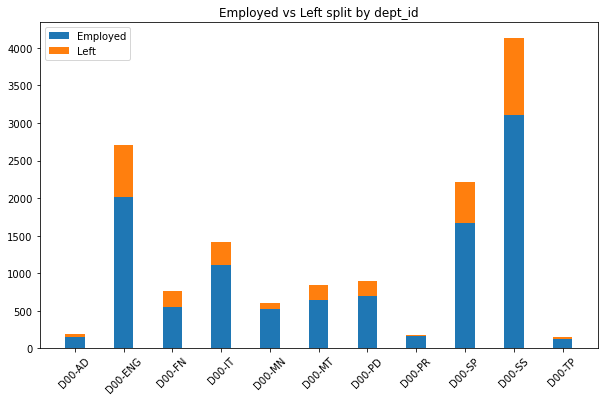

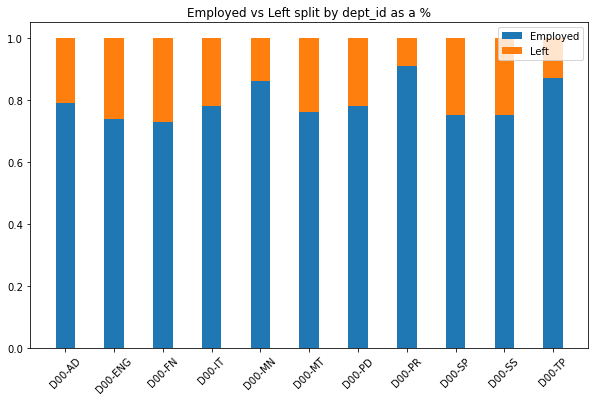

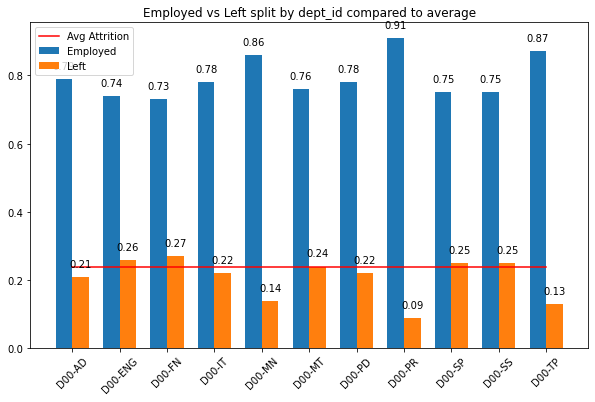

In [216]:
plot_stacked_bars_category('dept_id')

It is difficult to make a strong statement that any one department has seen higher attrition compared to others

### Salary level vs status

        Employed  Left  Employed_%  Left_%
salary                                    
high        1064    77        0.93    0.07
low         4851  2038        0.70    0.30
medium      4846  1240        0.80    0.20


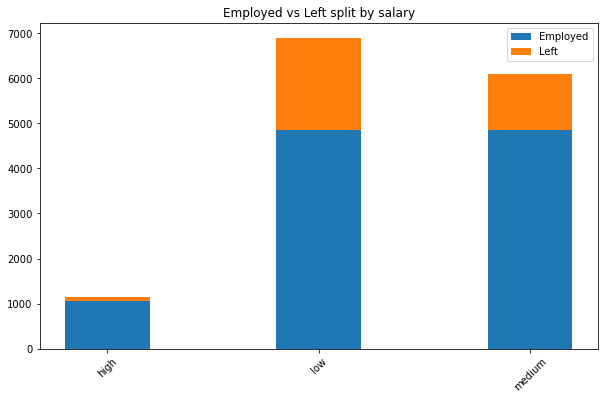

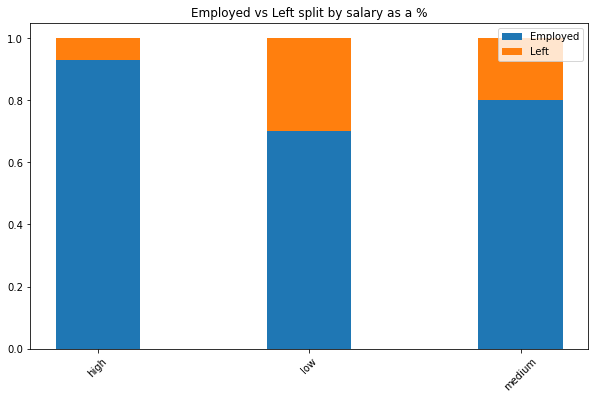

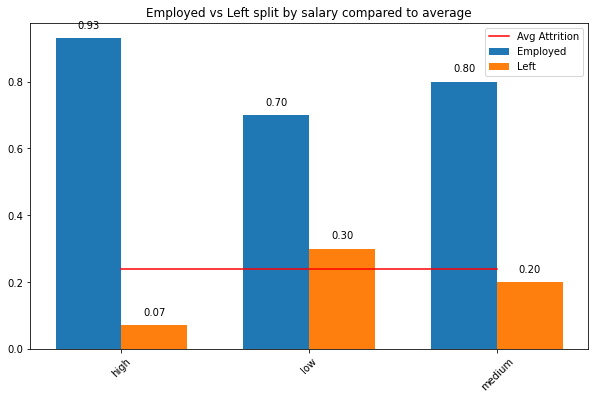

In [217]:
plot_stacked_bars_category('salary')

Low salaried employees tend to leave more

        Employed    Left  Employed_%  Left_%
tenure                                      
2.0         3101    68.0        0.98    0.02
3.0         4514  1492.0        0.75    0.25
4.0         1552   834.0        0.65    0.35
5.0          592   771.0        0.43    0.57
6.0          469   190.0        0.71    0.29
7.0          180     0.0        1.00    0.00
8.0          155     0.0        1.00    0.00
10.0         198     0.0        1.00    0.00


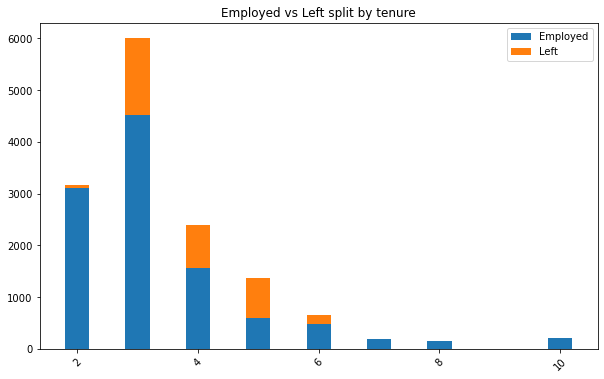

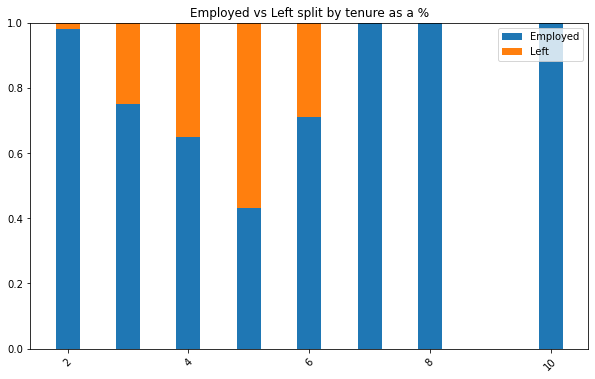

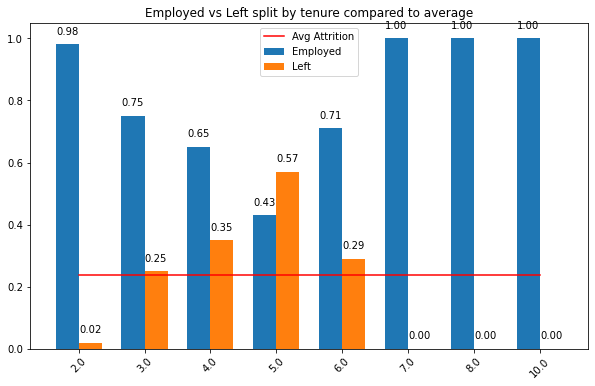

In [218]:
plot_stacked_bars_category('tenure')

Highest attrition is seen among employees 4 to 6 years old in the company. Employees who have completed 5 years have the highest attrition

                   Employed  Left  Employed_%  Left_%
recently_promoted                                    
0.0                   10482  3337        0.76    0.24
1.0                     279    18        0.94    0.06


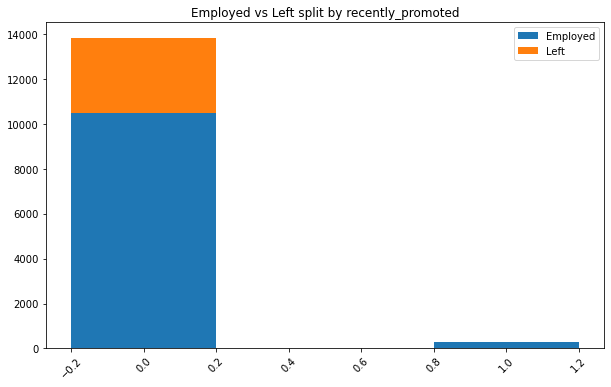

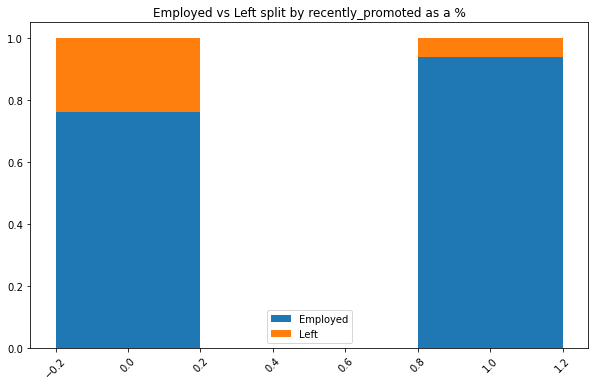

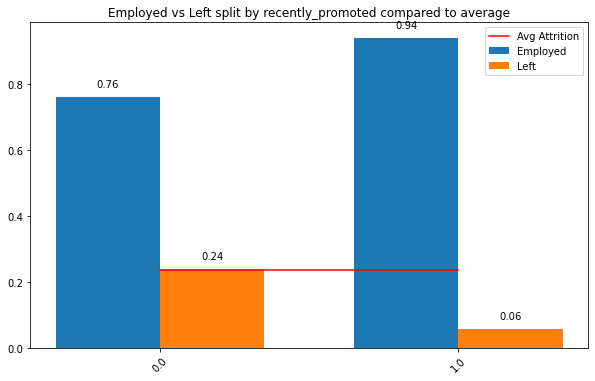

In [219]:
plot_stacked_bars_category('recently_promoted')

It is obvious that promotion works as good method to retain employees, but attrition among not promoted employees is around average, which is not enough for us to make a strong statement

            Employed  Left  Employed_%  Left_%
n_projects                                    
1                 54     7        0.89    0.11
2                838  1484        0.36    0.64
3               3717    71        0.98    0.02
4               3667   377        0.91    0.09
5               2006   560        0.78    0.22
6                479   614        0.44    0.56


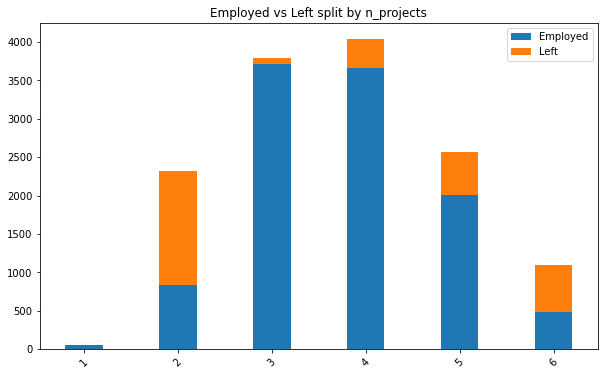

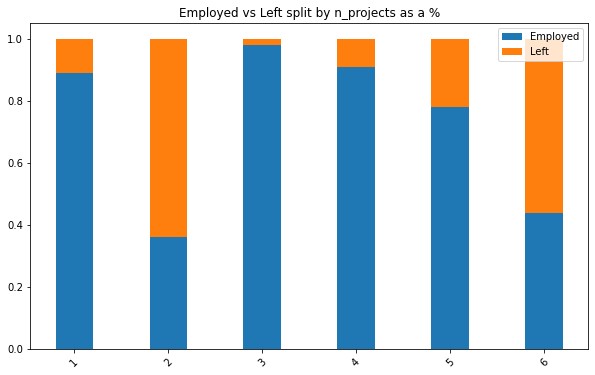

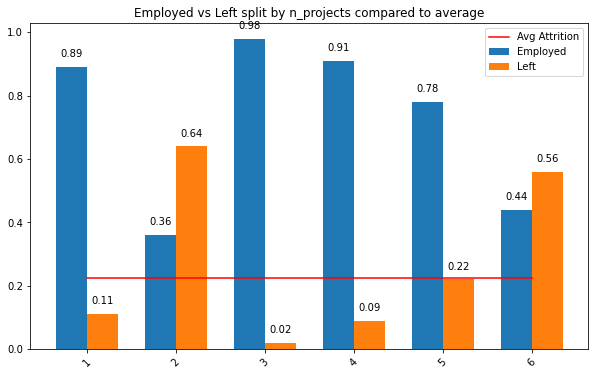

In [220]:
plot_stacked_bars_category('n_projects')

Too many projects makes people leave the company. Too less project assignment also makes people leave company. <b>3 - 5</b> projects appears to be optimal

                 Employed  Left  Employed_%  Left_%
filed_complaint                                    
0.0                  8872  3203        0.73    0.27
1.0                  1889   152        0.93    0.07


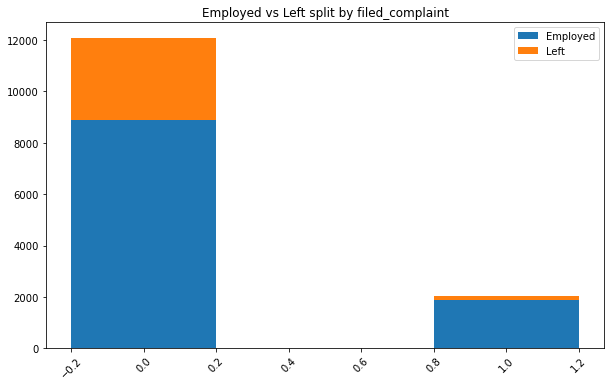

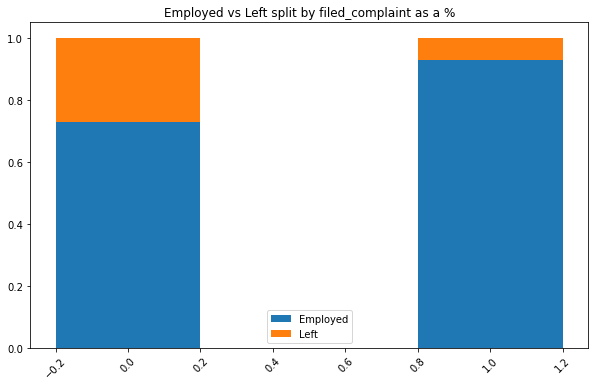

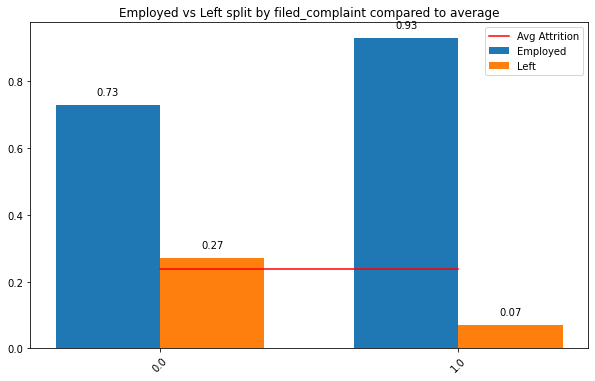

In [221]:
plot_stacked_bars_category('filed_complaint')

People who have filed complaint, obviously have some dissatisfaction and are more likely to leave

        Employed  Left  Employed_%  Left_%
gender                                    
Female      3334  1495        0.69    0.31
Male        7427  1860        0.80    0.20


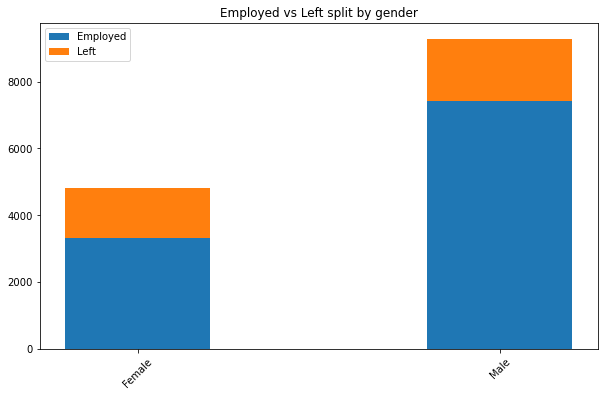

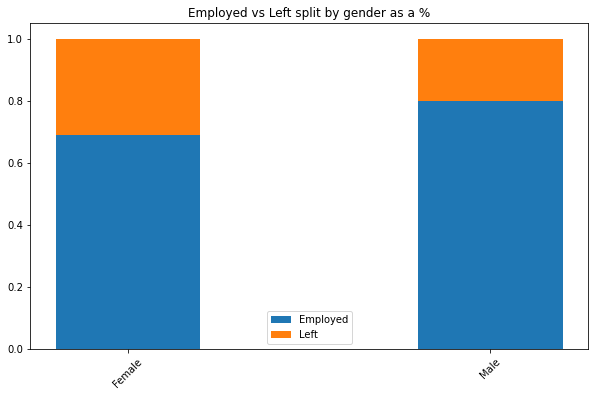

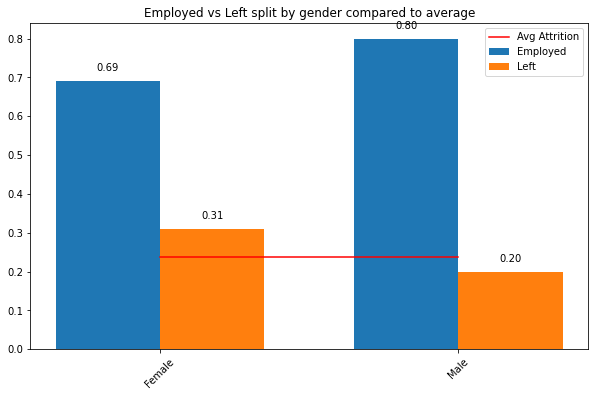

In [222]:
plot_stacked_bars_category('gender')

Female tend to leave the organization higher than males

                Employed  Left  Employed_%  Left_%
marital_status                                    
Married             5497  1408        0.80    0.20
Unmarried           5264  1947        0.73    0.27


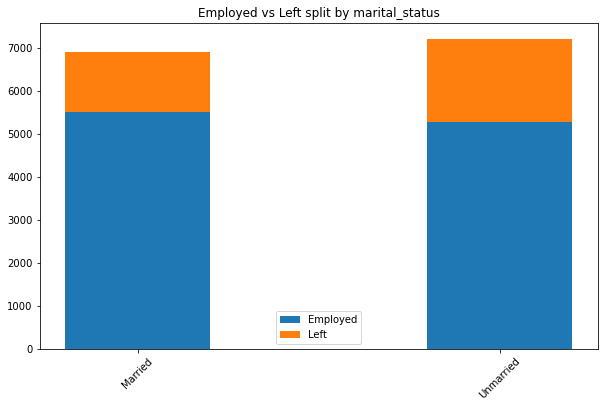

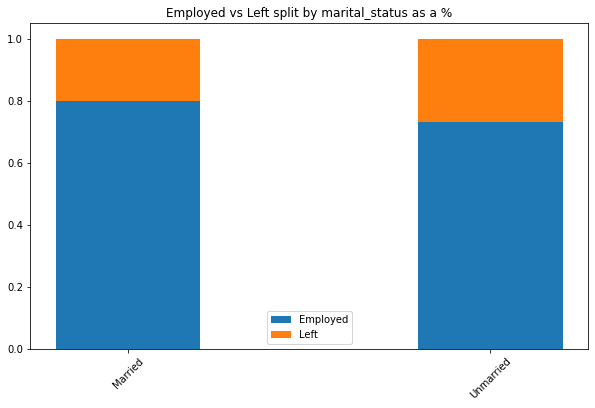

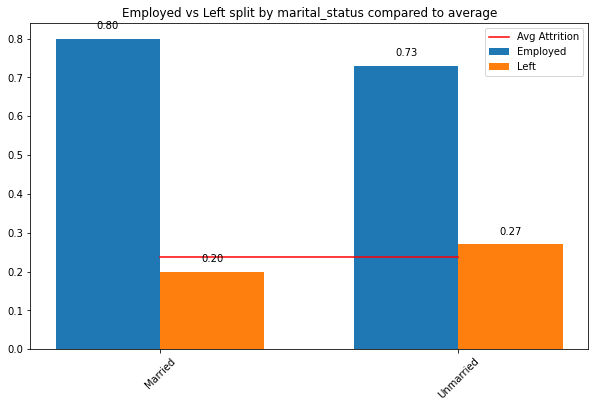

In [223]:
plot_stacked_bars_category('marital_status')

There appears to be higher attrition among unmarried employees. One other dimension we can check is, among the married & unmarried employees, how is the exit status by Female & Male. We want to check if marriage has a different impact on females and males

#### Creating the matrix for Marital Exits between Female & Male

In [224]:
marital_exits = pd.pivot_table(dataset[dataset['marital_status']=='Married'],
                                       index='gender', columns='status', values='employee_id', aggfunc='count')
marital_exits.loc['Female', 'Employed_%'] = marital_exits.loc['Female','Employed']/np.sum(marital_exits.loc['Female'])*100
marital_exits.loc['Female', 'Left_%'] = marital_exits.loc['Female','Left']/np.sum(marital_exits.loc['Female'])*100
marital_exits.loc['Male', 'Employed_%'] = marital_exits.loc['Male','Employed']/np.sum(marital_exits.loc['Male'])*100
marital_exits.loc['Male', 'Left_%'] = marital_exits.loc['Male','Left']/np.sum(marital_exits.loc['Male'])*100

marital_exits = marital_exits.transpose()
married_exits = marital_exits.drop(['Employed', 'Left'], axis=0)

In [225]:
round(marital_exits,0)

gender,Female,Male
status,,
Employed,1726.0,3771.0
Left,471.0,937.0
Employed_%,79.0,80.0
Left_%,21.0,20.0


#### Creating the matrix for Unmarital Exits between Female & Male

In [226]:
unmarital_exits = pd.pivot_table(dataset[dataset['marital_status']=='Unmarried'],
                                       index='gender', columns='status', values='employee_id', aggfunc='count')
unmarital_exits.loc['Female', 'Employed_%'] = unmarital_exits.loc['Female','Employed']/np.sum(unmarital_exits.loc['Female'])*100
unmarital_exits.loc['Female', 'Left_%'] = unmarital_exits.loc['Female','Left']/np.sum(unmarital_exits.loc['Female'])*100
unmarital_exits.loc['Male', 'Employed_%'] = unmarital_exits.loc['Male','Employed']/np.sum(unmarital_exits.loc['Male'])*100
unmarital_exits.loc['Male', 'Left_%'] = unmarital_exits.loc['Male','Left']/np.sum(unmarital_exits.loc['Male'])*100

unmarital_exits = unmarital_exits.transpose()
unmarried_exits = unmarital_exits.drop(['Employed', 'Left'], axis=0)

In [227]:
round(unmarital_exits,0)

gender,Female,Male
status,,
Employed,1608.0,3656.0
Left,1024.0,923.0
Employed_%,61.0,80.0
Left_%,38.0,20.0


Here the # of quits between Female and Male is almost comparable, but when we consider the base of total Females and Males, there is sharp contrast in quits. <br>
When we standardize it, we see that the unmarried female has a higher chance of quitting compared to their male counterpart

#### Plot the graph for Marital Exits

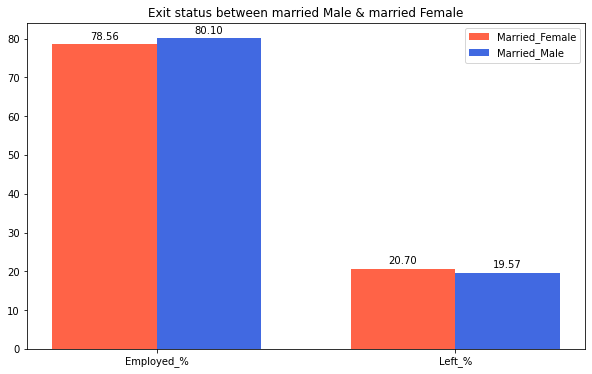

In [228]:
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ind = np.arange(len(married_exits.index))

rect1 = ax.bar(ind-width/2, married_exits['Female'], width, label='Married_Female', color='tomato')
rect2 = ax.bar(ind+width/2, married_exits['Male'], width, label='Married_Male', color='royalblue')


ax.legend()
ax.set_title('Exit status between married Male & married Female')
ax.set_xticks(ind)
ax.set_xticklabels(married_exits.index);

for x,y in zip(ind-width/2, married_exits['Female']):
    label = "{:.2f}".format(y)
    ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,5), ha='center')

for x,y in zip(ind+width/2, married_exits['Male']):
    label = "{:.2f}".format(y)
    ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,5), ha='center')


So from the above we can say, that a married Female or Male have the same chance of staying or quitting the company

#### Plot the graph for Unmarital exits

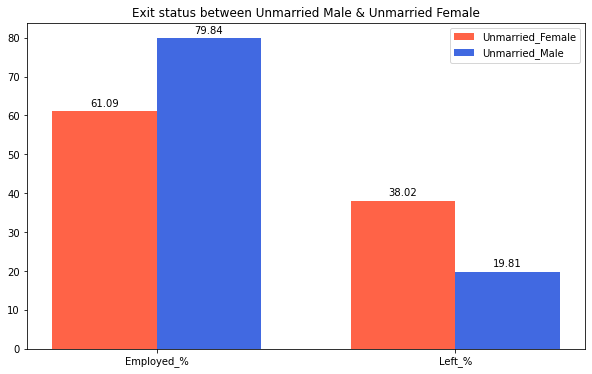

In [229]:
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ind = np.arange(len(unmarried_exits.index))

rect1 = ax.bar(ind-width/2, unmarried_exits['Female'], width, label='Unmarried_Female', color='tomato')
rect2 = ax.bar(ind+width/2, unmarried_exits['Male'], width, label='Unmarried_Male', color='royalblue')

ax.legend()
ax.set_title('Exit status between Unmarried Male & Unmarried Female')
ax.set_xticks(ind)
ax.set_xticklabels(unmarried_exits.index);

for x,y in zip(ind-width/2, unmarried_exits['Female']):
    label = "{:.2f}".format(y)
    ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,5), ha='center')

for x,y in zip(ind+width/2, unmarried_exits['Male']):
    label = "{:.2f}".format(y)
    ax.annotate(label, (x,y), textcoords='offset points', xytext=(0,5), ha='center')


Here we see a larger difference in exit status of unmarried Female vs unmarried male.<br>
An unmarried Female has lesser chance of staying

In [230]:
dataset.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure',
       'employee_id', 'age', 'gender', 'marital_status', 'dept_id',
       'dept_name', 'dept_head'],
      dtype='object')

## Explore the continous columns

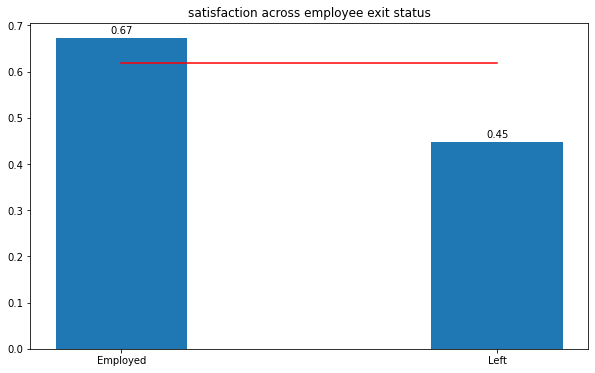

In [236]:
plot_stacked_bars_continous('satisfaction')

Employees with low satisfaction have tendency to leave the organization

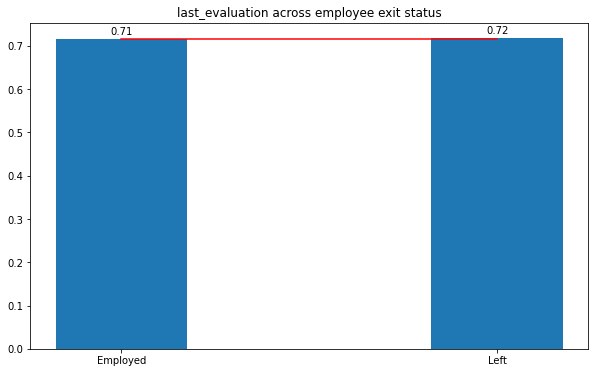

In [237]:
plot_stacked_bars_continous('last_evaluation')

This is an eye raiser. The company is losing quality people as the employees who have left have a high evaulation score of 0.73

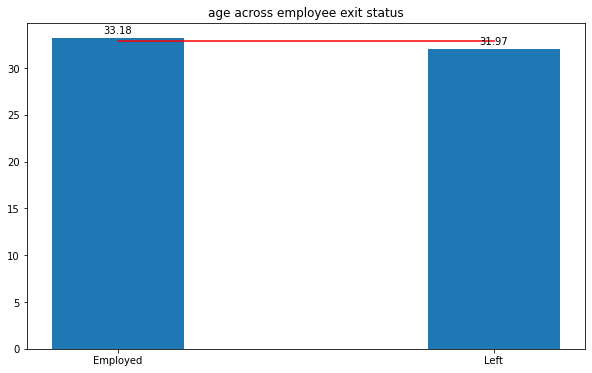

In [238]:
plot_stacked_bars_continous('age')

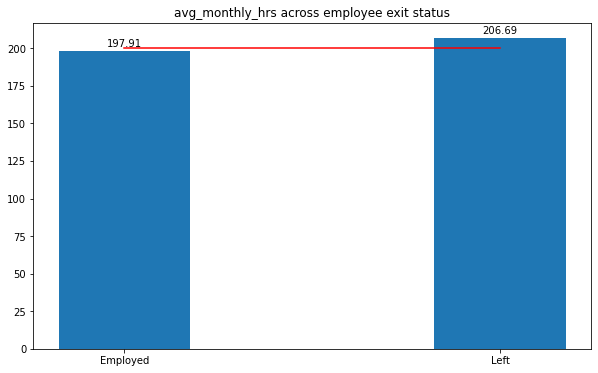

In [239]:
plot_stacked_bars_continous('avg_monthly_hrs')

People working more hrs are more likely to leave